**Laboratorio 02:**
Ramirez Leaños Jhon Erick


Importamos los paquetes de Python para la cracion de redes neuronales

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


Instalamos kaggle para poder importar el set de datos

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Usando la pqueteria de colab Importamos el token que nos proporcina Kaggle

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhonerick","key":"db8efc99541d0019a05a71f1d55f7a39"}'}

Usando la siguinete linea de codigo Movemos el archivo json de cagle a la ubicacion correcta en colab 

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargamos el data set que necesitamos en este caso especies de aves

In [9]:
!kaggle datasets download -d gpiosenka/100-bird-species


 97% 67.0M/69.0M [00:03<00:00, 33.4MB/s]
100% 69.0M/69.0M [00:03<00:00, 22.5MB/s]


Descomprimimos el archivo descargado

In [ ]:
!unzip 100-bird-species.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/WHITE CHEEKED TURACO/080.jpg  
  inflating: train/WHITE CHEEKED TURACO/081.jpg  
  inflating: train/WHITE CHEEKED TURACO/082.jpg  
  inflating: train/WHITE CHEEKED TURACO/083.jpg  
  inflating: train/WHITE CHEEKED TURACO/084.jpg  
  inflating: train/WHITE CHEEKED TURACO/085.jpg  
  inflating: train/WHITE CHEEKED TURACO/086.jpg  
  inflating: train/WHITE CHEEKED TURACO/087.jpg  
  inflating: train/WHITE CHEEKED TURACO/088.jpg  
  inflating: train/WHITE CHEEKED TURACO/089.jpg  
  inflating: train/WHITE CHEEKED TURACO/090.jpg  
  inflating: train/WHITE CHEEKED TURACO/091.jpg  
  inflating: train/WHITE CHEEKED TURACO/092.jpg  
  inflating: train/WHITE CHEEKED TURACO/093.jpg  
  inflating: train/WHITE CHEEKED TURACO/094.jpg  
  inflating: train/WHITE CHEEKED TURACO/095.jpg  
  inflating: train/WHITE CHEEKED TURACO/096.jpg  
  inflating: train/WHITE CHEEKED TURACO/097.jpg  
  inflating: train/WHITE CHEEKED TURACO

utilizamos el siguinte bloque de codigo para cargar y mostrar una lista de nombres de clases de un conjunto de datos de entrenamiento de una red neuronal.

In [ ]:
import os 
PATH = 'train'
classes = os.listdir(PATH)
classes
print(classes)

['TURKEY VULTURE', 'SNOWY EGRET', 'MOURNING DOVE', 'RED FACED CORMORANT', 'BLACK FACED SPOONBILL', 'SCARLET IBIS', 'STRIPED OWL', 'WOOD DUCK', 'BAR-TAILED GODWIT', 'BEARDED REEDLING', 'PATAGONIAN SIERRA FINCH', 'FAIRY BLUEBIRD', 'MIKADO  PHEASANT', 'HEPATIC TANAGER', 'GLOSSY IBIS', 'CRESTED KINGFISHER', 'CEDAR WAXWING', 'HAWFINCH', 'EASTERN TOWEE', 'VENEZUELIAN TROUPIAL', 'CALIFORNIA GULL', 'SURF SCOTER', 'FAIRY PENGUIN', 'BLACK FRANCOLIN', 'CAPPED HERON', 'OCELLATED TURKEY', 'MILITARY MACAW', 'CERULEAN WARBLER', 'WHITE THROATED BEE EATER', 'BLACK THROATED BUSHTIT', 'TAIWAN MAGPIE', 'ANHINGA', 'AMETHYST WOODSTAR', 'COLLARED CRESCENTCHEST', 'BLUE DACNIS', 'MALABAR HORNBILL', 'GOLD WING WARBLER', 'DEMOISELLE CRANE', 'ALBERTS TOWHEE', 'BORNEAN LEAFBIRD', 'ROSEATE SPOONBILL', 'DAURIAN REDSTART', 'ROSY FACED LOVEBIRD', 'PHAINOPEPLA', 'BOBOLINK', 'GROVED BILLED ANI', 'HORNED LARK', 'BANDED STILT', 'EMPEROR PENGUIN', 'GOLDEN CHEEKED WARBLER', 'NORTHERN SHOVELER', 'WHITE TAILED TROPIC', 'ROADR

Categorizamos cada clase y vemos cuantas imagenes tiene cada una 

In [ ]:
imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

Categoría: TURKEY VULTURE. Imágenes: 164
Categoría: SNOWY EGRET. Imágenes: 132
Categoría: MOURNING DOVE. Imágenes: 154
Categoría: RED FACED CORMORANT. Imágenes: 153
Categoría: BLACK FACED SPOONBILL. Imágenes: 162
Categoría: SCARLET IBIS. Imágenes: 138
Categoría: STRIPED OWL. Imágenes: 143
Categoría: WOOD DUCK. Imágenes: 214
Categoría: BAR-TAILED GODWIT. Imágenes: 168
Categoría: BEARDED REEDLING. Imágenes: 144
Categoría: PATAGONIAN SIERRA FINCH. Imágenes: 130
Categoría: FAIRY BLUEBIRD. Imágenes: 160
Categoría: MIKADO  PHEASANT. Imágenes: 154
Categoría: HEPATIC TANAGER. Imágenes: 160
Categoría: GLOSSY IBIS. Imágenes: 175
Categoría: CRESTED KINGFISHER. Imágenes: 163
Categoría: CEDAR WAXWING. Imágenes: 180
Categoría: HAWFINCH. Imágenes: 167
Categoría: EASTERN TOWEE. Imágenes: 157
Categoría: VENEZUELIAN TROUPIAL. Imágenes: 152
Categoría: CALIFORNIA GULL. Imágenes: 160
Categoría: SURF SCOTER. Imágenes: 185
Categoría: FAIRY PENGUIN. Imágenes: 154
Categoría: BLACK FRANCOLIN. Imágenes: 131
Cate

vemos la cantidad de Imagens del DataSet

In [ ]:
imgs[:500]
len(imgs)

80085

visualizamos un conjunto de imágenes aleatorias de un conjunto de datos utilizando la librería skimage y matplotlib en Python.

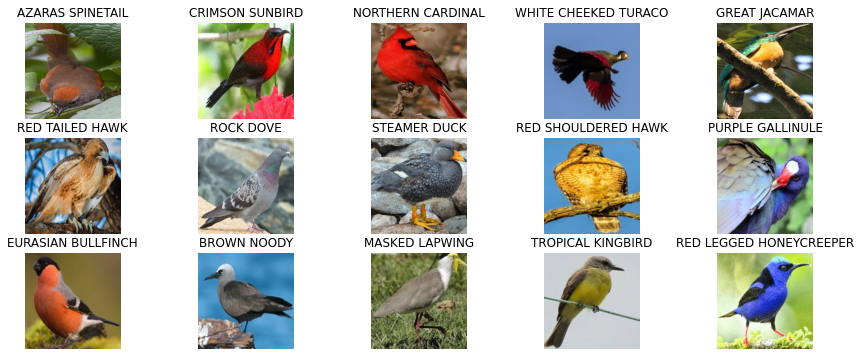

In [ ]:
import random 
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(15,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

Asignamos los datos de entrenamieto Y testeto

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(64068, 16017)

definimos una clase Dataset personalizada utilizando PyTorch para cargar y transformar imágenes en un conjunto de datos de entrenamiento o prueba para una red neuronal.

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    #print(f"imagen: {img}")
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

definimos una transformación de redimensionamiento de imágenes y luego creamos dos conjuntos de datos, uno de entrenamiento y otro de prueba, utilizando la clase Dataset definida anteriormente.

In [ ]:
import albumentations as A

trans = A.Compose([
    A.Resize(224, 224)
])

dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device), 
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(64068, 16017)

In [ ]:
dataset['train'][2]

(tensor([[[0.2235, 0.2157, 0.2157,  ..., 0.2235, 0.2275, 0.2353],
          [0.2196, 0.2157, 0.2196,  ..., 0.2275, 0.2314, 0.2392],
          [0.2196, 0.2235, 0.2275,  ..., 0.2275, 0.2314, 0.2353],
          ...,
          [0.5373, 0.5961, 0.6588,  ..., 0.2039, 0.2078, 0.2039],
          [0.6667, 0.6863, 0.7020,  ..., 0.2118, 0.2157, 0.2157],
          [0.6314, 0.6078, 0.6157,  ..., 0.2039, 0.2118, 0.2118]],
 
         [[0.3843, 0.3765, 0.3765,  ..., 0.3725, 0.3765, 0.3843],
          [0.3843, 0.3765, 0.3804,  ..., 0.3765, 0.3804, 0.3882],
          [0.3843, 0.3882, 0.3922,  ..., 0.3765, 0.3804, 0.3843],
          ...,
          [0.4745, 0.5333, 0.5961,  ..., 0.2588, 0.2627, 0.2588],
          [0.5961, 0.6157, 0.6314,  ..., 0.2706, 0.2745, 0.2745],
          [0.5451, 0.5294, 0.5373,  ..., 0.2745, 0.2824, 0.2824]],
 
         [[0.4549, 0.4471, 0.4471,  ..., 0.4471, 0.4510, 0.4588],
          [0.4471, 0.4471, 0.4510,  ..., 0.4510, 0.4549, 0.4627],
          [0.4471, 0.4510, 0.4549,  ...,

creamos un gráfico que muestra una selección aleatoria de imágenes del conjunto de datos de entrenamiento

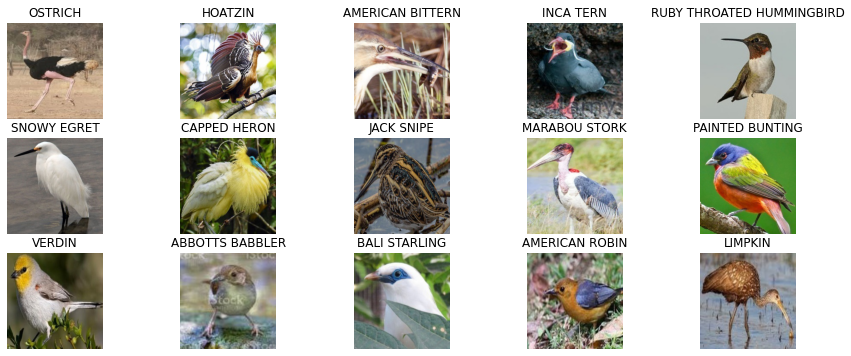

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(15,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

Creamos dos DataLoader para el conjunto de datos de entrenamiento y el conjunto de datos de prueba respectivamente.

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 224, 224])

creamos una instancia del modelo ResNet-18 utilizando la implementación proporcionada por torchvision.models.

In [ ]:
import torchvision

resnet = torchvision.models.resnet18()
resnet


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

definimos una clase de modelo personalizada llamada ModelCustom que hereda de la clase torch.nn.Module. Este modelo personalizado utiliza una red neuronal convolucional pre-entrenada ResNet-18 como base, pero se le añade una capa completamente conectada adicional (self.fc) para llevar a cabo la clasificación.

In [ ]:
class ModelCustom(torch.nn.Module):
  def __init__(self, n_outputs=500, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.resnet18(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(512, 500)

  def forward(self, x):
    x = self.resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

definimos una instancia de la clase ModelCustom, que es una subclase de torch.nn.Module. Esta clase implementa una red neuronal convolucional para clasificación de imágenes utilizando la arquitectura de ResNet18 como base.

In [ ]:
model_custom = ModelCustom()
outputs = model_custom(torch.randn(64, 3, 224, 224))
outputs.shape

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([64, 500])

definimos una función llamada fit que entrena un modelo de redes neuronales usando un conjunto de datos (dataloader) y una serie de parámetros de entrenamiento (epochs y lr). En concreto, la función implementa el algoritmo de descenso de gradiente estocástico (SGD) con función de pérdida de entropía cruzada (CrossEntropyLoss) y se ejecuta durante epochs.

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

###Entrenado el modelo desde

>definimos una instancia de un modelo ModelCustom, y posteriormente utiliza la función fit para entrenar el modelo durante 15 epochs utilizando el conjunto de datos proporcionado por el dataloader.



In [ ]:
model_c = ModelCustom()
fit(model_c, dataloader, epochs=15)

val_loss 7.62157 val_acc 0.01042: 100%|██████████| 63/63 [01:08<00:00,  1.08s/it]


Epoch 1/15 loss 5.98221 val_loss 7.62157 acc 0.01530 val_acc 0.01042


val_loss 5.70041 val_acc 0.02752: 100%|██████████| 63/63 [01:00<00:00,  1.05it/s]


Epoch 2/15 loss 5.21234 val_loss 5.70041 acc 0.05391 val_acc 0.02752


val_loss 5.07097 val_acc 0.04880: 100%|██████████| 63/63 [00:56<00:00,  1.12it/s]


Epoch 3/15 loss 4.64077 val_loss 5.07097 acc 0.09960 val_acc 0.04880


val_loss 6.97284 val_acc 0.03976: 100%|██████████| 63/63 [00:55<00:00,  1.14it/s]


Epoch 4/15 loss 4.20608 val_loss 6.97284 acc 0.15545 val_acc 0.03976


val_loss 8.75900 val_acc 0.02890: 100%|██████████| 63/63 [00:55<00:00,  1.14it/s]


Epoch 5/15 loss 3.82144 val_loss 8.75900 acc 0.21306 val_acc 0.02890


val_loss 8.07764 val_acc 0.04838: 100%|██████████| 63/63 [00:55<00:00,  1.13it/s]


Epoch 6/15 loss 3.46636 val_loss 8.07764 acc 0.26787 val_acc 0.04838


val_loss 4.09102 val_acc 0.14505: 100%|██████████| 63/63 [00:56<00:00,  1.12it/s]


Epoch 7/15 loss 3.15282 val_loss 4.09102 acc 0.32296 val_acc 0.14505


val_loss 3.74928 val_acc 0.23909: 100%|██████████| 63/63 [00:55<00:00,  1.14it/s]


Epoch 8/15 loss 2.86729 val_loss 3.74928 acc 0.37594 val_acc 0.23909


val_loss 4.69329 val_acc 0.11322: 100%|██████████| 63/63 [00:55<00:00,  1.13it/s]


Epoch 9/15 loss 2.61731 val_loss 4.69329 acc 0.42217 val_acc 0.11322


val_loss 7.88384 val_acc 0.04073: 100%|██████████| 63/63 [00:55<00:00,  1.13it/s]


Epoch 10/15 loss 2.40045 val_loss 7.88384 acc 0.46462 val_acc 0.04073


val_loss 4.72743 val_acc 0.14513: 100%|██████████| 63/63 [00:56<00:00,  1.11it/s]


Epoch 11/15 loss 2.19439 val_loss 4.72743 acc 0.50820 val_acc 0.14513


val_loss 6.26347 val_acc 0.05761: 100%|██████████| 63/63 [00:56<00:00,  1.12it/s]


Epoch 12/15 loss 2.01089 val_loss 6.26347 acc 0.54318 val_acc 0.05761


val_loss 14.07310 val_acc 0.00513: 100%|██████████| 63/63 [00:55<00:00,  1.13it/s]


Epoch 13/15 loss 1.84553 val_loss 14.07310 acc 0.57929 val_acc 0.00513


val_loss 6.83073 val_acc 0.10148: 100%|██████████| 63/63 [00:55<00:00,  1.13it/s]


Epoch 14/15 loss 1.70562 val_loss 6.83073 acc 0.60685 val_acc 0.10148


val_loss 12.55553 val_acc 0.03524: 100%|██████████| 63/63 [00:56<00:00,  1.12it/s]

Epoch 15/15 loss 1.56839 val_loss 12.55553 acc 0.63610 val_acc 0.03524


###Transfer Learning
instanciamos el modelo ModelCustom pre-entrenado en la base de datos de ImageNet y congela todas sus capas, excepto la capa lineal añadida (fc). A continuación, se entrena el modelo utilizando la función fit con los datos cargados en el dataloader. Durante el entrenamiento, se ajustan los pesos de la capa lineal (fc), mientras que las capas de ResNet se mantienen fijas.

In [ ]:
model_c = ModelCustom(pretrained=True, freeze=True)
fit(model_c, dataloader)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

val_loss 4.93822 val_acc 0.21356: 100%|██████████| 63/63 [00:57<00:00,  1.09it/s]


Epoch 1/5 loss 5.63882 val_loss 4.93822 acc 0.09439 val_acc 0.21356


val_loss 3.88817 val_acc 0.45337: 100%|██████████| 63/63 [00:57<00:00,  1.10it/s]


Epoch 2/5 loss 4.44227 val_loss 3.88817 acc 0.36015 val_acc 0.45337


val_loss 3.20374 val_acc 0.58298: 100%|██████████| 63/63 [00:57<00:00,  1.10it/s]


Epoch 3/5 loss 3.56476 val_loss 3.20374 acc 0.54242 val_acc 0.58298


val_loss 2.65084 val_acc 0.65963: 100%|██████████| 63/63 [00:56<00:00,  1.11it/s]


Epoch 4/5 loss 2.93088 val_loss 2.65084 acc 0.64499 val_acc 0.65963


val_loss 2.27519 val_acc 0.70298: 100%|██████████| 63/63 [00:56<00:00,  1.11it/s]

Epoch 5/5 loss 2.47191 val_loss 2.27519 acc 0.70501 val_acc 0.70298


## Fine Tuning
Todavía podemos mejorar un poco más si, además de utilizar los pesos descargados de Imagenet en `resnet`, entrenamos también la red completa.

In [ ]:
model_c = ModelCustom(pretrained=True, freeze=False)
fit(model_c, dataloader)

val_loss 3.22811 val_acc 0.52061: 100%|██████████| 63/63 [00:54<00:00,  1.15it/s]


Epoch 1/5 loss 4.75379 val_loss 3.22811 acc 0.24830 val_acc 0.52061


val_loss 1.77599 val_acc 0.75118: 100%|██████████| 63/63 [00:55<00:00,  1.13it/s]


Epoch 2/5 loss 2.42926 val_loss 1.77599 acc 0.67741 val_acc 0.75118


val_loss 1.11000 val_acc 0.82826: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]


Epoch 3/5 loss 1.41017 val_loss 1.11000 acc 0.81464 val_acc 0.82826


val_loss 0.88277 val_acc 0.85170: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]


Epoch 4/5 loss 0.94785 val_loss 0.88277 acc 0.87038 val_acc 0.85170


val_loss 0.75012 val_acc 0.86549: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]

Epoch 5/5 loss 0.69889 val_loss 0.75012 acc 0.90115 val_acc 0.86549


In [ ]:
model_o = ModelCustom(pretrained=True, freeze=True)
fit(model_o, dataloader)
model_o.unfreeze()
fit(model_o, dataloader, lr=1e-4)

val_loss 4.92451 val_acc 0.21146: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


Epoch 1/5 loss 5.62440 val_loss 4.92451 acc 0.09150 val_acc 0.21146


val_loss 3.92005 val_acc 0.45077: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]


Epoch 2/5 loss 4.43152 val_loss 3.92005 acc 0.36304 val_acc 0.45077


val_loss 3.17877 val_acc 0.58615: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


Epoch 3/5 loss 3.55700 val_loss 3.17877 acc 0.54511 val_acc 0.58615


val_loss 2.67340 val_acc 0.66019: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


Epoch 4/5 loss 2.92401 val_loss 2.67340 acc 0.64827 val_acc 0.66019


val_loss 2.27153 val_acc 0.70602: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]


Epoch 5/5 loss 2.47141 val_loss 2.27153 acc 0.70589 val_acc 0.70602


val_loss 2.10207 val_acc 0.72113: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]


Epoch 1/5 loss 2.17504 val_loss 2.10207 acc 0.74055 val_acc 0.72113


val_loss 1.98203 val_acc 0.73321: 100%|██████████| 63/63 [00:53<00:00,  1.19it/s]


Epoch 2/5 loss 2.04096 val_loss 1.98203 acc 0.75170 val_acc 0.73321


val_loss 1.90691 val_acc 0.73859: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]


Epoch 3/5 loss 1.95494 val_loss 1.90691 acc 0.76025 val_acc 0.73859


val_loss 1.85479 val_acc 0.74514: 100%|██████████| 63/63 [00:56<00:00,  1.12it/s]


Epoch 4/5 loss 1.89083 val_loss 1.85479 acc 0.76378 val_acc 0.74514


val_loss 1.81567 val_acc 0.74592: 100%|██████████| 63/63 [00:55<00:00,  1.13it/s]

Epoch 5/5 loss 1.83929 val_loss 1.81567 acc 0.76906 val_acc 0.74592
